In [ ]:
!git clone https://github.com/XuJiacong/PIDNet.git

Cloning into 'PIDNet'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 386 (delta 131), reused 125 (delta 125), pack-reused 193 (from 1)
Receiving objects: 100% (386/386), 212.80 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [ ]:
!pip install torch torchvision pytorch-lightning albumentations
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 51.8 MB/s eta 0:00:00


In [ ]:
import os
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np

In [ ]:
class LoveDADataset(Dataset):
    def __init__(self, root_dir, split, transform=None):
        """
        Args:
            root_dir (str): Path to the dataset root (e.g., 'LoveDA/train').
            split (str): 'rural' or 'urban'.
            transform (callable, optional): Transformations to apply to images and masks.
        """
        self.image_dir = os.path.join(root_dir, split, 'images_png')
        self.mask_dir = os.path.join(root_dir, split, 'masks_png')
        self.image_list = sorted(os.listdir(self.image_dir))
        self.mask_list = sorted(os.listdir(self.mask_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_list[idx])

        # Load images and masks
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Transformations
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image, mask = augmented['image'], augmented['mask']

        # Normalize mask to be in [0, num_classes-1]
        mask = mask // 255  # Assuming the masks are binary (255 for foreground, 0 for background)
        return image, mask.long()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Train.zip" -d "/content/PIDNet/data/LoveDA"
!unzip "/content/drive/My Drive/Val.zip" -d "/content/PIDNet/data/LoveDA"

Streaming output truncated to the last 5000 lines.
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2025.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2026.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2027.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2028.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2029.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2030.png  
  inflating: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2031.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2032.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2033.png  
  inflating: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2034.png  
  inflating: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2035.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Urban/images_png/2036.png  
 extracting: /content/PIDNet/data/LoveDA/Train/Ur

In [ ]:
!unzip "/content/drive/My Drive/Test.zip" -d "/content/PIDNet/data/LoveDA"

Archive:  /content/drive/My Drive/Test.zip
   creating: /content/PIDNet/data/LoveDA/Test/
   creating: /content/PIDNet/data/LoveDA/Test/Rural/
   creating: /content/PIDNet/data/LoveDA/Test/Rural/images_png/
  inflating: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4191.png  
  inflating: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4192.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4193.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4194.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4195.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4196.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4197.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4198.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4199.png  
  inflating: /content/PIDNet/data/LoveDA/Test/Rural/images_png/4200.png  
 extracting: /content/PIDNet/data/LoveDA/Test/Rural/i

In [ ]:
%cd /content/PIDNet

[Errno 2] No such file or directory: '/content/PIDNet'
/content


In [ ]:
!unzip "/content/drive/My Drive/PIDNet_S_ImageNet.pth.tar" -d "/content/PIDNet/pretrained_models/imagenet"

Archive:  /content/drive/My Drive/PIDNet_S_ImageNet.pth.tar
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data.pkl  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1916234616032  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1916234616416  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1917426772320  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918147720736  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918147721024  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918147721216  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918227854032  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918227854128  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918227854224  
 extracting: /content/PIDNet/pretrained_models/imagenet/archive/data/1918227856528  
 extracting: /c

In [ ]:
# Define paths
train_root = '/content/PIDNet/data/LoveDA/Train'
val_root = '/content/PIDNet/data/LoveDA/Val'

# Define data transformations
from albumentations import Compose, Normalize, HorizontalFlip, RandomCrop
from albumentations.pytorch import ToTensorV2

transform = Compose([
    RandomCrop(512, 512),  # Adjust crop size as needed
    HorizontalFlip(p=0.5),
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Instantiate datasets
train_dataset = LoveDADataset(train_root, split='Urban', transform=transform)
val_dataset = LoveDADataset(val_root, split='Rural', transform=transform)

# Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [ ]:
%cd /content/PIDNet/models

/content/PIDNet/models


In [ ]:
import sys
sys.path.append('/content/PIDNet')
from models.pidnet import get_pred_model
import torch
import os

# Step 1: Define the number of classes
num_classes = 7

# Step 2: Initialize PIDNet-S model (m=2, n=3, planes=32 for 's' variant)
model = get_pred_model(name='pidnet_s', num_classes=num_classes)

# Update the path to point to the extracted .pth files
weights_path = '/content/PIDNet/pretrained_models/imagenet/archive/data'

# Step 3: Load all weights from the directory
weight_files = os.listdir(weights_path)
model_weights = {}

for weight_file in weight_files:
    # Check for .pth files in the directory
    if weight_file.endswith('.pth'):
        weight_path = os.path.join(weights_path, weight_file)

        # Load the weights from the .pth file
        part_weights = torch.load(weight_path, map_location='cuda')  # Ensure weights are loaded to GPU

        # If part_weights contains a 'state_dict', use that; otherwise, use the entire content
        if 'state_dict' in part_weights:
            part_weights = part_weights['state_dict']

        # Update model weights with part weights
        model_weights.update(part_weights)  # Update the dictionary

# Step 4: Load the weights into the model
model.load_state_dict(model_weights, strict=False)  # Use strict=False if weights are not exact

# Step 5: Move the model to GPU
model = model.to('cuda')

In [ ]:
from torch import nn, optim
from torchmetrics import JaccardIndex  # For mIoU

# Set up the criterion, optimizer, and Jaccard index
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
jaccard = JaccardIndex(task="multiclass", num_classes=7).to('cuda')

class DownsampleLayer(nn.Module):
    def __init__(self, scale_factor):
        super(DownsampleLayer, self).__init__()
        self.downsample = nn.AvgPool2d(kernel_size=scale_factor, stride=scale_factor)  # Use average pooling for downsampling

    def forward(self, x):
        return self.downsample(x)

# Initialize the downsampling layer with a factor of 8
downsample_layer = DownsampleLayer(scale_factor=8).to('cuda')

# Training Loop
for epoch in range(20):
    model.train()  # Set model to training mode
    train_loss = 0

    for images, masks in train_loader:  # Iterate through the training data
        images, masks = images.to('cuda'), masks.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Zero out gradients before each step
        outputs = model(images)  # Get model outputs

        # Modification: The output is a tensor, no need for dict access
        main_output = outputs

        # Downsample the masks to match the output size
        masks = downsample_layer(masks.unsqueeze(1).float()).squeeze(1).long()

        # Calculate the loss using cross entropy loss
        loss = criterion(main_output, masks)

        # Backpropagate and update weights
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Print training loss for each epoch
    print(f"Epoch {epoch + 1}/20, Loss: {train_loss / len(train_loader)}")

    # Save the model's state after every epoch (optional, but good for recovery)
    torch.save(model.state_dict(), 'model_trained_on_urban.pth')  # Save after every epoch, or you can save it after the final epoch



Epoch 1/20, Loss: 0.006030245480461168
Epoch 2/20, Loss: 0.0011669752493365362
Epoch 3/20, Loss: 0.0005068432938091611
Epoch 4/20, Loss: 0.00028215703097450833
Epoch 5/20, Loss: 0.00019739652944267098
Epoch 6/20, Loss: 0.00025927376195024636
Epoch 7/20, Loss: 0.00011009224364967054
Epoch 8/20, Loss: 0.00010463270593082506
Epoch 9/20, Loss: 0.00013660005856527718
Epoch 10/20, Loss: 5.5178657867869195e-05
Epoch 11/20, Loss: 4.0609449255479596e-05
Epoch 12/20, Loss: 3.476688314259864e-05
Epoch 13/20, Loss: 2.7528640800882793e-05
Epoch 14/20, Loss: 3.0155677827883586e-05
Epoch 15/20, Loss: 2.490325468614702e-05
Epoch 16/20, Loss: 2.6363639782493447e-05
Epoch 17/20, Loss: 1.891639366064476e-05
Epoch 18/20, Loss: 1.3305937915672444e-05
Epoch 19/20, Loss: 0.0010087043171511157
Epoch 20/20, Loss: 5.875230613836308e-05


In [ ]:
# Load the trained model
model.load_state_dict(torch.load('model_trained_on_urban.pth'))
model.eval()  # Set model to evaluation mode

# Now perform testing on the target domain (LoveDA-rural)
miou_per_class_test = torch.zeros(7).to('cuda')
class_counts_test = torch.zeros(7).to('cuda')

# Initialize the downsampling layer with a factor of 8
downsample_layer = DownsampleLayer(scale_factor=8).to('cuda')


with torch.no_grad():
    for images, masks in val_loader:  # Test on target domain (LoveDA-rural)
        images, masks = images.to('cuda'), masks.to('cuda')
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        # Downsample masks before comparison
        masks = downsample_layer(masks.unsqueeze(1).float()).squeeze(1).long()

        for class_id in range(7):
            preds_class = (preds == class_id)
            masks_class = (masks == class_id)

            if masks_class.sum() > 0:
                class_iou = jaccard(preds_class, masks_class)
                miou_per_class_test[class_id] += class_iou
                class_counts_test[class_id] += 1

miou_per_class_test /= torch.maximum(class_counts_test, torch.ones_like(class_counts_test))
miou_per_class_test = miou_per_class_test.cpu().numpy() * 100
overall_test_miou = miou_per_class_test.mean()

print(f"Per-Class Test mIoU (Target Domain):")
for class_id, class_miou in enumerate(miou_per_class_test):
    print(f"  Class {class_id}: {class_miou:.2f}%")
print(f"Overall Test mIoU (Target Domain): {overall_test_miou:.2f}%")

<ipython-input-26-aaf285159200>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_trained_on_urban.pth'))


Per-Class Test mIoU (Target Domain):
  Class 0: 97.17%
  Class 1: 0.00%
  Class 2: 0.00%
  Class 3: 0.00%
  Class 4: 0.00%
  Class 5: 0.00%
  Class 6: 0.00%
Overall Test mIoU (Target Domain): 13.88%


In [ ]:
# Load the trained model
model.load_state_dict(torch.load('model_trained_on_urban.pth'))
model = model.to('cuda')
model.eval()  # Set model to evaluation mode

# Initialize the downsampling layer with a factor of 8
downsample_layer = DownsampleLayer(scale_factor=8).to('cuda')

# Perform testing on the target domain (LoveDA-rural) for 20 epochs
for epoch in range(20):  # Testing loop for 20 epochs
    miou_per_class_test = torch.zeros(7).to('cuda')
    class_counts_test = torch.zeros(7).to('cuda')

with torch.no_grad():
    for images, masks in val_loader:
        print("Unique classes in raw masks:", torch.unique(masks))
        images, masks = images.to('cuda'), masks.to('cuda')
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)


        # Downsample masks before comparison
        masks = downsample_layer(masks.unsqueeze(1).float()).squeeze(1).long()
        print(f"Shape of downsampled masks: {masks.shape}")
        print(f"Unique classes in downsampled masks: {torch.unique(masks)}")
        break
        for class_id in range(7):
            preds_class = (preds == class_id)
            masks_class = (masks == class_id)

            print(f"Class {class_id} - Predicted pixels: {preds_class.sum().item()}, Ground truth pixels: {masks_class.sum().item()}")

            if masks_class.sum() > 0:
                class_iou = jaccard(preds_class, masks_class)
                miou_per_class_test[class_id] += class_iou
                class_counts_test[class_id] += 1


    # Normalize per-class IoU
    miou_per_class_test /= torch.maximum(class_counts_test, torch.ones_like(class_counts_test))
    miou_per_class_test = miou_per_class_test.cpu().numpy() * 100
    overall_test_miou = miou_per_class_test.mean()

    # Print results for this epoch
    print(f"Test Phase Epoch {epoch + 1}/20, Per-Class Test mIoU (Target Domain):")
    for class_id, class_miou in enumerate(miou_per_class_test):
        print(f"  Class {class_id}: {class_miou:.2f}%")
    print(f"Test Phase Epoch {epoch + 1}/20, Overall Test mIoU (Target Domain): {overall_test_miou:.2f}%")


<ipython-input-32-2d4ada1f33fa>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_trained_on_urban.pth'))


Unique classes in raw masks: tensor([0])
Shape of downsampled masks: torch.Size([4, 64, 64])
Unique classes in downsampled masks: tensor([0], device='cuda:0')
Test Phase Epoch 20/20, Per-Class Test mIoU (Target Domain):
  Class 0: 0.00%
  Class 1: 0.00%
  Class 2: 0.00%
  Class 3: 0.00%
  Class 4: 0.00%
  Class 5: 0.00%
  Class 6: 0.00%
Test Phase Epoch 20/20, Overall Test mIoU (Target Domain): 0.00%


<ipython-input-35-dd0b4a8c40d4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_trained_on_urban.pth'))


Unique values in sample mask: tensor([0])
Test Phase Epoch 20/20, Per-Class Test mIoU (Target Domain):
  Class 0: 0.00%
  Class 1: 0.00%
  Class 2: 0.00%
  Class 3: 0.00%
  Class 4: 0.00%
  Class 5: 0.00%
  Class 6: 0.00%
Test Phase Epoch 20/20, Overall Test mIoU (Target Domain): 0.00%


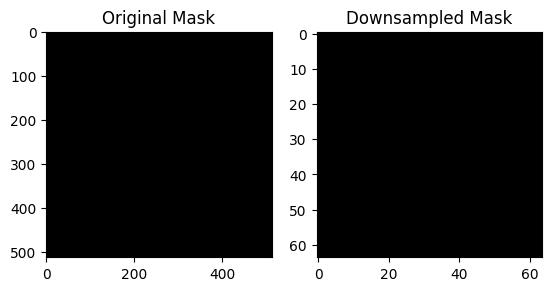

In [ ]:
# Load the trained model
import matplotlib.pyplot as plt
model.load_state_dict(torch.load('model_trained_on_urban.pth'))
model = model.to('cuda')
model.eval()  # Set model to evaluation mode

# Initialize the downsampling layer with a factor of 8
downsample_layer = DownsampleLayer(scale_factor=8).to('cuda')
# Verify the unique class labels in a sample mask from the dataset


# Perform testing on the target domain (LoveDA-rural) for 20 epochs
for epoch in range(20):  # Testing loop for 20 epochs
    miou_per_class_test = torch.zeros(7).to('cuda')
    class_counts_test = torch.zeros(7).to('cuda')

with torch.no_grad():
    for images, masks in val_loader:

        images, masks = images.to('cuda'), masks.to('cuda')
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        sample_mask = train_dataset[0][1]  # Get the mask of the first sample
        print(f"Unique values in sample mask: {torch.unique(sample_mask)}")
        plt.subplot(1, 2, 1)
        plt.imshow(masks[0].cpu().numpy(), cmap='gray')
        plt.title("Original Mask")
        # Downsample masks before comparison
        masks = downsample_layer(masks.unsqueeze(1).float()).squeeze(1).long()
        plt.subplot(1, 2, 2)
        plt.imshow(masks[0].cpu().numpy(), cmap='gray')
        plt.title("Downsampled Mask")
        break
        for class_id in range(7):
            preds_class = (preds == class_id)
            masks_class = (masks == class_id)

            print(f"Class {class_id} - Predicted pixels: {preds_class.sum().item()}, Ground truth pixels: {masks_class.sum().item()}")

            if masks_class.sum() > 0:
                class_iou = jaccard(preds_class, masks_class)
                miou_per_class_test[class_id] += class_iou
                class_counts_test[class_id] += 1


    # Normalize per-class IoU
    miou_per_class_test /= torch.maximum(class_counts_test, torch.ones_like(class_counts_test))
    miou_per_class_test = miou_per_class_test.cpu().numpy() * 100
    overall_test_miou = miou_per_class_test.mean()

    # Print results for this epoch
    print(f"Test Phase Epoch {epoch + 1}/20, Per-Class Test mIoU (Target Domain):")
    for class_id, class_miou in enumerate(miou_per_class_test):
        print(f"  Class {class_id}: {class_miou:.2f}%")
    print(f"Test Phase Epoch {epoch + 1}/20, Overall Test mIoU (Target Domain): {overall_test_miou:.2f}%")
